# Retail Challenge

### **Contexto**

En un mundo donde las empresas dependen cada vez más de los datos para tomar decisiones estratégicas, la capacidad de segmentar clientes de manera efectiva se vuelve crucial. La segmentación de clientes permite a las empresas personalizar sus estrategias de marketing, mejorar la retención de clientes y maximizar el valor del cliente a lo largo del tiempo.

### **Objetivos**

Este proyecto tiene como objetivo desarrollar una aplicación web interactiva que permita a los científicos de datos realizar análisis de segmentación de clientes utilizando la metodología RFM (Recencia, Frecuencia, Valor Monetario). A través de procesos como lo son:

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del cliente a través del tiempo (CTLV)

La metodología de Segmentación de Clientes es una herramienta poderosa que se usa en diferentes industrias, desde la banca, turismo y la industria de consumo masivo. Cada vez las empresas quieren conocer mejor a sus clientes por medio de las diferentes fuentes de datos que
tienen disponibles con la información de estos clientes.


# Índice

- [Descripción de los datos](#Descripción-de-los-datos)

- [Analisis Estadistico Descriptivo](#Analisis-Estadistico-Descriptivo)

- [Visualizaciones](#Visualizaciones)

- [Reporte de resultados](#Reporte-de-resultados)


# Descripción de los datos

- INVOICE_NO : Número de serie de factura
- STOCK_CODE : Número serie del producto
- DESCRIPTION : Descripción del producto
- QUANTITY : Cantidad de compra del producto
- INVOICE_DATE : Fecha y hora de facturación
- UNIT_PRICE : Precio unitario
- CUSTOMER_ID : ID del cliente
- REGION : País de origen de la compra

# Analisis Estadistico Descriptivo

## Carga de dataset.
--- 
Utilizando la librería Pandas de Python cargamos el archivo csv para después obtener una muestra del dataset.
Con el método info() tenermos más información de las columnas, los valores y los tipos de datos que existen.

In [320]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go

In [321]:
df = pd.read_csv(r"Online_Retail.csv", encoding='unicode_escape')

In [322]:
df.sample(10)

INVOICE_NO STOCK_CODE                       DESCRIPTION  QUANTITY  \
114237     546008      21898          POTTING SHED ROSE CANDLE         2   
28036      538625      22502        PICNIC BASKET WICKER SMALL         1   
460192     575898     85049C           ROMANTIC PINKS RIBBONS          2   
235517     557642        DOT                    DOTCOM POSTAGE         1   
292749     562560      20764      ABSTRACT CIRCLES SKETCHBOOK          2   
158133     550277      84375     SET OF 20 KIDS COOKIE CUTTERS        12   
535961     581217     72799E  IVORY PILLAR CANDLE SILVER FLOCK         3   
399375     571279      23329     DECORATIVE WICKER HEART LARGE         4   
333228     566190      20724       RED RETROSPOT CHARLOTTE BAG        10   
460917     575930      22643  SET OF 4 NAPKIN CHARMS LEAVES            1   

            INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
114237  08/03/2020 15:43        2.46          NaN  United Kingdom  
28036   13/12/2019 12:50        5.95      14544.0  United Kingdom  
460192  11/11/2020 15:08        1.25      16368.0  United Kingdom  
235517  21/06/2020 16:35       88.75          NaN  United Kingdom  
292749  05/08/2020 17:12        3.75      14156.0            EIRE  
158133  15/04/2020 12:48        2.10      12639.0          Sweden  
535961  08/12/2020 09:20        3.29          NaN  United Kingdom  
399375  16/10/2020 12:54        1.65      16466.0  United Kingdom  
333228  09/09/2020 13:20        0.85      12748.0  United Kingdom  
460917  11/11/2020 17:58        4.96          NaN  United Kingdom

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Transformacion de tipo de datos.
---
De acuerdo a los resultados obtenidos del método info() se determina cambiar los tipos de datos de las columnas 'INVOICE_DATE' y 'CUSTOMER_ID' para un mejor procesamiento de datos.


In [324]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('object')

In [325]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [326]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

## Analisis estadistico. 
---
Mediante el método describe() podemos notar que existen valores atípicos como números negativos en las columnas de 'QUANTITY' y 'UNIT_PRICE'.


In [327]:
df.describe().T

count                           mean                  min  \
QUANTITY      541909.0                        9.55225             -80995.0   
INVOICE_DATE    541909  2020-07-04 08:55:02.927097344  2019-12-01 08:26:00   
UNIT_PRICE    541909.0                       4.611114            -11062.06   

                              25%                  50%                  75%  \
QUANTITY                      1.0                  3.0                 10.0   
INVOICE_DATE  2020-03-28 11:34:00  2020-07-19 17:17:00  2020-10-19 11:27:00   
UNIT_PRICE                   1.25                 2.08                 4.13   

                              max         std  
QUANTITY                  80995.0  218.081158  
INVOICE_DATE  2020-12-09 12:50:00         NaN  
UNIT_PRICE                38970.0   96.759853

In [328]:
df.select_dtypes('object').describe().T

count  unique                                 top    freq
INVOICE_NO     541909   25900                              573585    1114
STOCK_CODE     541909    4070                              85123A    2313
DESCRIPTION    540455    4214  WHITE HANGING HEART T-LIGHT HOLDER    2369
CUSTOMER_ID  406829.0  4372.0                             17841.0  7983.0
REGION         541909      38                      United Kingdom  495478

<Axes: xlabel='QUANTITY'>

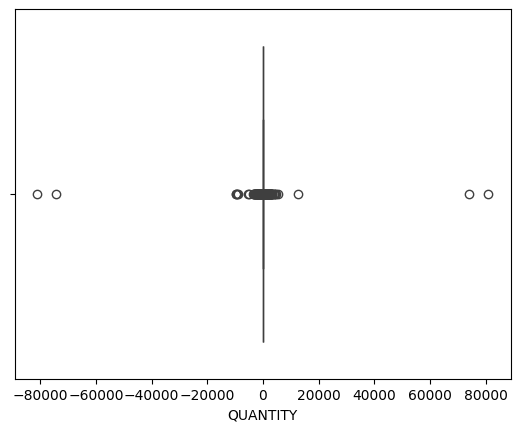

In [329]:
sns.boxplot(x=df['QUANTITY'])

Empleando un diagrama de caja buscamos representar los valores de la columna 'QUANTITY' a través de sus cuartiles y observamos que existen bastantes datos atípicos.

<Axes: xlabel='UNIT_PRICE'>

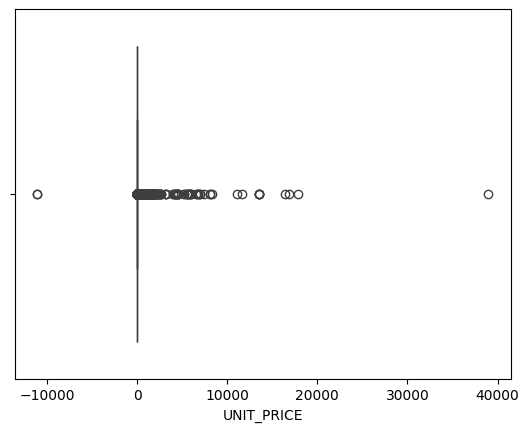

In [330]:
sns.boxplot(x=df['UNIT_PRICE'])

Empleando un diagrama de caja buscamos representar los valores de la columna 'UNIT_PRICE' a través de sus cuartiles y observamos que existen bastantes datos atípicos.

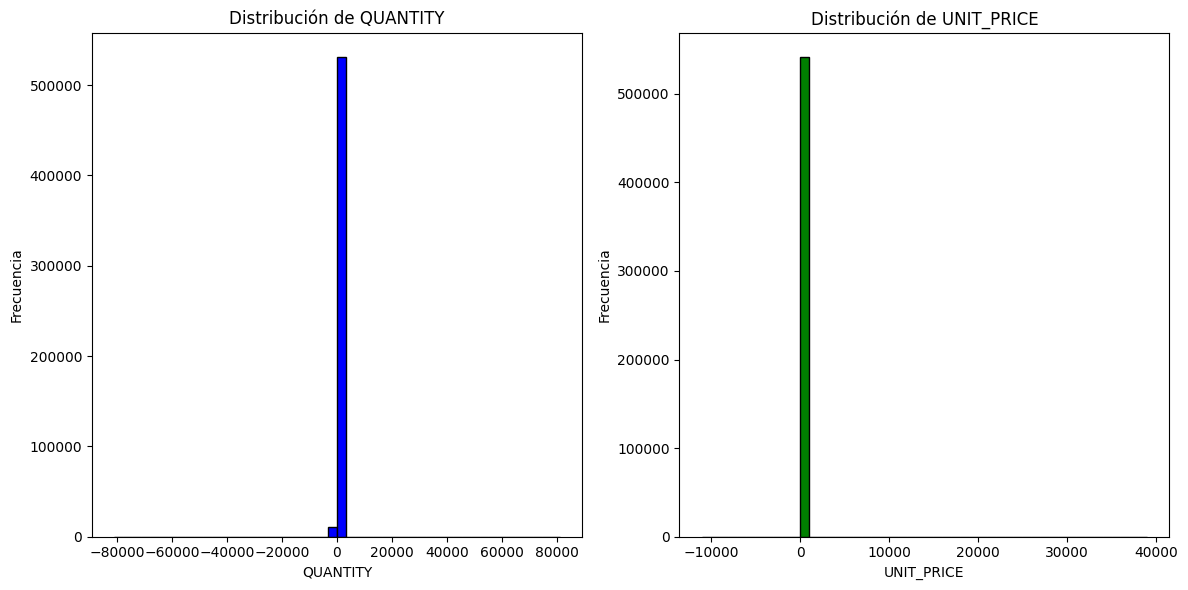

In [331]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Usando histogramas representamos la distribución de los valores y notamos que la inmensa mayoria se encuentra dentro de un rango.

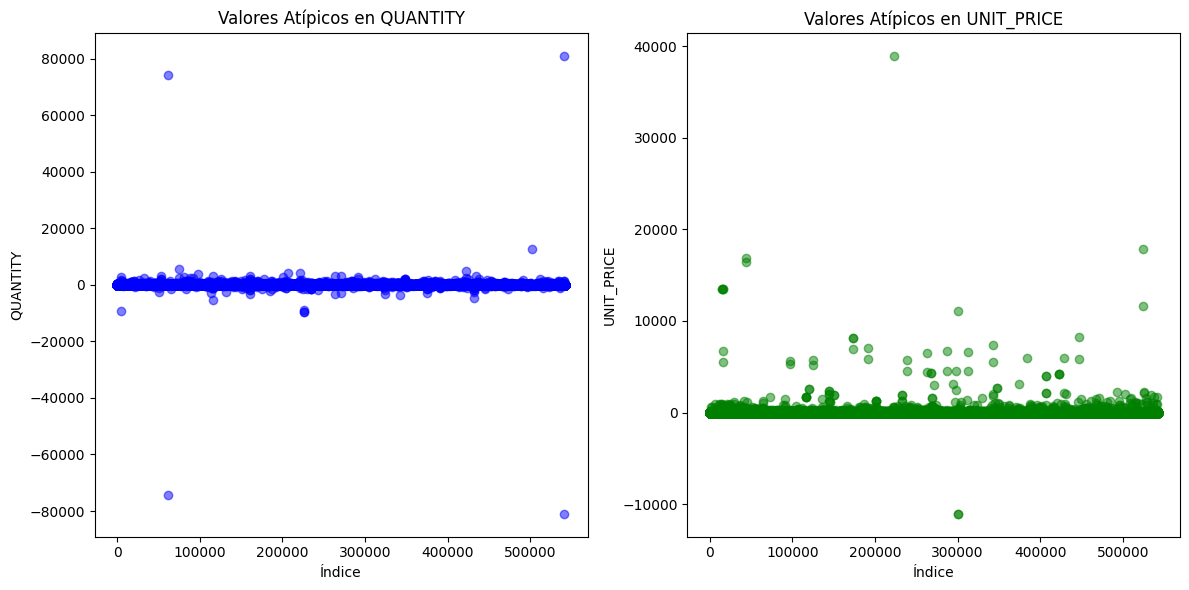

In [332]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

Con un diagrama de dispersión visualizamos los valores atípicos de forma más especifica. 

## Tratamiendo de valores ausentes.
---
Mediante el método isna() encontramos una gran cantidad de valores ausentes en las columnas 'DESCRIPTION' y 'CUSTOMER_ID' lo cual podría afectar nuestros resultados del analisis, así que utilizando diferentes métodos estos fueron rellenados. 


In [333]:
#Antes 
df.isna().sum()

INVOICE_NO           0
STOCK_CODE           0
DESCRIPTION       1454
QUANTITY             0
INVOICE_DATE         0
UNIT_PRICE           0
CUSTOMER_ID     135080
REGION               0
dtype: int64

In [334]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [335]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

In [336]:
df[df['DESCRIPTION']=='unknown']

INVOICE_NO STOCK_CODE DESCRIPTION  QUANTITY        INVOICE_DATE  \
622        536414      22139     unknown        56 2019-12-01 11:52:00   
1970       536545      21134     unknown         1 2019-12-01 14:32:00   
1971       536546      22145     unknown         1 2019-12-01 14:33:00   
1972       536547      37509     unknown         1 2019-12-01 14:33:00   
1987       536549     85226A     unknown         1 2019-12-01 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581     unknown        -2 2020-12-07 18:26:00   
535326     581203      23406     unknown        15 2020-12-07 18:31:00   
535332     581209      21620     unknown         6 2020-12-07 18:35:00   
536981     581234      72817     unknown        27 2020-12-08 10:33:00   
538554     581408      85175     unknown        20 2020-12-08 14:06:00   

        UNIT_PRICE CUSTOMER_ID          REGION  
622            0.0         NaN  United Kingdom  
1970           0.0         NaN  United Kingdom  
1971           0.0         NaN  United Kingdom  
1972           0.0         NaN  United Kingdom  
1987           0.0         NaN  United Kingdom  
...            ...         ...             ...  
535322         0.0         NaN  United Kingdom  
535326         0.0         NaN  United Kingdom  
535332         0.0         NaN  United Kingdom  
536981         0.0         NaN  United Kingdom  
538554         0.0         NaN  United Kingdom  

[1501 rows x 8 columns]

In [337]:
100*df[df['DESCRIPTION']=='unknown']['INVOICE_NO'].count()/df.shape[0]

0.2769837740284808

In [338]:
df.drop(df[df['DESCRIPTION']=='unknown'].index,axis=0,inplace=True)

Después de encontrar los valores ausentes, reemplazamos '?' de la columna 'DESCRIPTION' por la palabra 'unknown' y rellenamos espacios vacíos con la misma, para luego sacar el porcentaje de los datos 'unknown' y llegar a la conclusión de que mejor era eliminarlos. 

In [339]:
df[df['CUSTOMER_ID'].isna()]

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
1443       536544      21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444       536544      21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445       536544      21786               POLKADOT RAIN HAT          4   
1446       536544      21787            RAIN PONCHO RETROSPOT         2   
1447       536544      21790               VINTAGE SNAP CARDS         9   
...           ...        ...                              ...       ...   
541536     581498     85099B          JUMBO BAG RED RETROSPOT         5   
541537     581498     85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538     581498      85150    LADIES & GENTLEMEN METAL SIGN         1   
541539     581498      85174                S/4 CACTI CANDLES         1   
541540     581498        DOT                   DOTCOM POSTAGE         1   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
1443   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1444   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1445   2019-12-01 14:32:00        0.85         NaN  United Kingdom  
1446   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
1447   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
...                    ...         ...         ...             ...  
541536 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541537 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541538 2020-12-09 10:26:00        4.96         NaN  United Kingdom  
541539 2020-12-09 10:26:00       10.79         NaN  United Kingdom  
541540 2020-12-09 10:26:00     1714.17         NaN  United Kingdom  

[133579 rows x 8 columns]

In [340]:
100*df['CUSTOMER_ID'].isna().sum()/df.shape[0]

24.71817589672988

In [341]:

df['CUSTOMER_ID'].fillna(0, inplace=True)

In [342]:
#Después 
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

Posteriormente, buscamos el porcentaje de datos ausentes de la columna 'CUSTOMER_ID' y de acuerdo al resultado nos percatamos que no era adecuado eliminarlos. Seguido los valores ausentes fueron reemplazados por 0.

## Tratamiento de duplicados.
---
Con el método drop_duplicates() borramos las filas duplicadas del dataset. 

In [343]:
df = df.drop_duplicates().reset_index(drop=True)

In [344]:
df.duplicated().sum()

0

### Quantity
---
Filtramos los valores de la columna 'QUANTITY' para encontrar los datos menores a -2000.

In [345]:
df[df['QUANTITY'] < -2000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
4216      C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
50161      540564      22617                  mouldy thrown away.     -2600   
60844     C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
112219     545990      84598                                check     -3000   
114433     546152     72140F                           throw away     -5368   
129826     547560      72732               thrown away-can't sell     -2472   
158057    C550456      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   
182747     552733      23059                    Thrown away-rusty     -2376   
222766     556687      23003         Printing smudges/thrown away     -9058   
222767     556690      23005         printing smudges/thrown away     -9600   
222768     556691      23005         printing smudges/thrown away     -9600   
260766     560039      20713         wrongly marked. 23343 in box     -3100   
371215     569466      23270               incorrect stock entry.     -2880   
426346     573593    79323LP                Unsaleable destroyed.     -2618   
426347     573594     79323P                Unsaleable destroyed.     -2003   
426349     573596     79323W                Unsaleable destroyed.     -4830   
533660    C581484      23843           PAPER CRAFT  LITTLE BIRDIE    -80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
4216   2019-12-02 14:23:00        0.03      15838.0  United Kingdom  
50161  2020-01-10 10:36:00        0.00          0.0  United Kingdom  
60844  2020-01-18 10:17:00        1.04      12346.0  United Kingdom  
112219 2020-03-08 13:07:00        0.00          0.0  United Kingdom  
114433 2020-03-09 17:25:00        0.00          0.0  United Kingdom  
129826 2020-03-23 17:28:00        0.00          0.0  United Kingdom  
158057 2020-04-18 13:08:00        2.10      15749.0  United Kingdom  
182747 2020-05-11 10:48:00        0.00          0.0  United Kingdom  
222766 2020-06-14 10:36:00        0.00          0.0  United Kingdom  
222767 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
222768 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
260766 2020-07-14 14:27:00        0.00          0.0  United Kingdom  
371215 2020-10-04 11:42:00        0.00          0.0  United Kingdom  
426346 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426347 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426349 2020-10-31 15:17:00        0.00          0.0  United Kingdom  
533660 2020-12-09 09:27:00        2.08      16446.0  United Kingdom

In [346]:
100*df[df['QUANTITY'] <=0]['INVOICE_NO'].count()/df.shape[0]

1.8096199125462495

In [347]:
#Eliminamos los datos dado que el porcentage es menor
df.drop(df[df['QUANTITY'] <= 0]['QUANTITY'].index,axis=0,inplace=True)

Enseguida, averiguamos el porcentaje de los valores negativos en la columna 'QUANTITY', por lo cual decidimos descartar todos los números menores a 0.

In [348]:
df[df['QUANTITY'] > 3000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
52005      540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
60839      541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
96207      544612      22053                EMPIRE DESIGN ROSETTE      3906   
158456     550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
203564     554868      22197                 SMALL POPCORN HOLDER      4300   
260767     560040      23343                  came coded as 20713      3100   
267686     560599      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
416713     573008      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
495915     578841      84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
533659     581483      23843           PAPER CRAFT  LITTLE BIRDIE     80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
52005  2020-01-11 12:55:00        2.10      15749.0  United Kingdom  
60839  2020-01-18 10:01:00        1.04      12346.0  United Kingdom  
96207  2020-02-22 10:43:00        0.82      18087.0  United Kingdom  
158456 2020-04-18 13:20:00        2.10      15749.0  United Kingdom  
203564 2020-05-27 10:52:00        0.72      13135.0  United Kingdom  
260767 2020-07-14 14:28:00        0.00          0.0  United Kingdom  
267686 2020-07-19 17:04:00        0.06      14609.0  United Kingdom  
416713 2020-10-27 12:26:00        0.21      12901.0  United Kingdom  
495915 2020-11-25 15:57:00        0.00      13256.0  United Kingdom  
533659 2020-12-09 09:15:00        2.08      16446.0  United Kingdom

In [349]:
100*df[df['QUANTITY'] > 3000]['INVOICE_NO'].count()/df.shape[0]

0.0019031089187296368

In [350]:
df.drop(df[df['QUANTITY'] > 3000]['QUANTITY'].index,axis=0,inplace=True)

### Unit Price
---
Filtramos los valores de la columna 'UNIT_PRICE' para encontrar los datos menores o igual 0.

In [351]:
df[df['UNIT_PRICE'] <= 0].sample(20)

INVOICE_NO STOCK_CODE                        DESCRIPTION  QUANTITY  \
465679     576632      21823                      amazon adjust        10   
128301     547396      79321                      CHILLI LIGHTS         1   
122556     546933      22626               BLACK KITCHEN SCALES         1   
103147     545176      37333               RETRO "TEA FOR ONE"          3   
509697     579873     35819B                              check        18   
103160     545176      22649       STRAWBERRY FAIRY CAKE TEAPOT         1   
40829      539856      79321                      CHILLI LIGHTS         1   
310082     564530      21901                KEY FOB  BACK DOOR          1   
168363     551324     85017C                              Found        13   
294587     562973      23157         SET OF 6 NATIVITY MAGNETS        240   
14027      537534      22681      FRENCH BLUE METAL DOOR SIGN 6         2   
40327      539750      22114  HOT WATER BOTTLE TEA AND SYMPATHY         1   
190394     553481      21181                     on cargo order       192   
472911     577102      21915                         John Lewis       200   
239489     558340      22685      FRENCH BLUE METAL DOOR SIGN 0         1   
122546     546933      22681      FRENCH BLUE METAL DOOR SIGN 6         7   
103156     545176      22677      FRENCH BLUE METAL DOOR SIGN 2         1   
30101      538877      22356        CHARLOTTE BAG PINK POLKADOT         1   
6283       536942      22139                             amazon        15   
164501     550948     17109D                         Adjustment        14   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
465679 2020-11-16 08:55:00         0.0          0.0  United Kingdom  
128301 2020-03-22 16:54:00         0.0          0.0  United Kingdom  
122556 2020-03-18 11:02:00         0.0          0.0  United Kingdom  
103147 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
509697 2020-11-30 17:00:00         0.0          0.0  United Kingdom  
103160 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
40829  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
310082 2020-08-25 14:57:00         0.0          0.0  United Kingdom  
168363 2020-04-27 15:47:00         0.0          0.0  United Kingdom  
294587 2020-08-11 11:42:00         0.0      14911.0            EIRE  
14027  2019-12-07 11:48:00         0.0          0.0  United Kingdom  
40327  2019-12-21 15:40:00         0.0          0.0  United Kingdom  
190394 2020-05-17 12:06:00         0.0          0.0  United Kingdom  
472911 2020-11-17 17:01:00         0.0          0.0  United Kingdom  
239489 2020-06-28 14:01:00         0.0          0.0  United Kingdom  
122546 2020-03-18 11:02:00         0.0          0.0  United Kingdom  
103156 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
30101  2019-12-14 15:29:00         0.0          0.0  United Kingdom  
6283   2019-12-03 12:08:00         0.0          0.0  United Kingdom  
164501 2020-04-21 15:56:00         0.0          0.0  United Kingdom

In [352]:
100*df[df['UNIT_PRICE'] <= 0]['INVOICE_NO'].count()/df.shape[0]

0.1096211599288985

In [353]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] <= 0]['UNIT_PRICE'].index,axis=0,inplace=True)

In [354]:
100*df[df['UNIT_PRICE'] > 4000]['INVOICE_NO'].count()/df.shape[0]

0.001333663573837331

In [355]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] > 4000]['UNIT_PRICE'].index,axis=0,inplace=True)

Enseguida, averiguamos el porcentaje de los valores menores o igual a 0 en la columna 'UNIT_PRICE', por lo cual decidimos descartarlos.

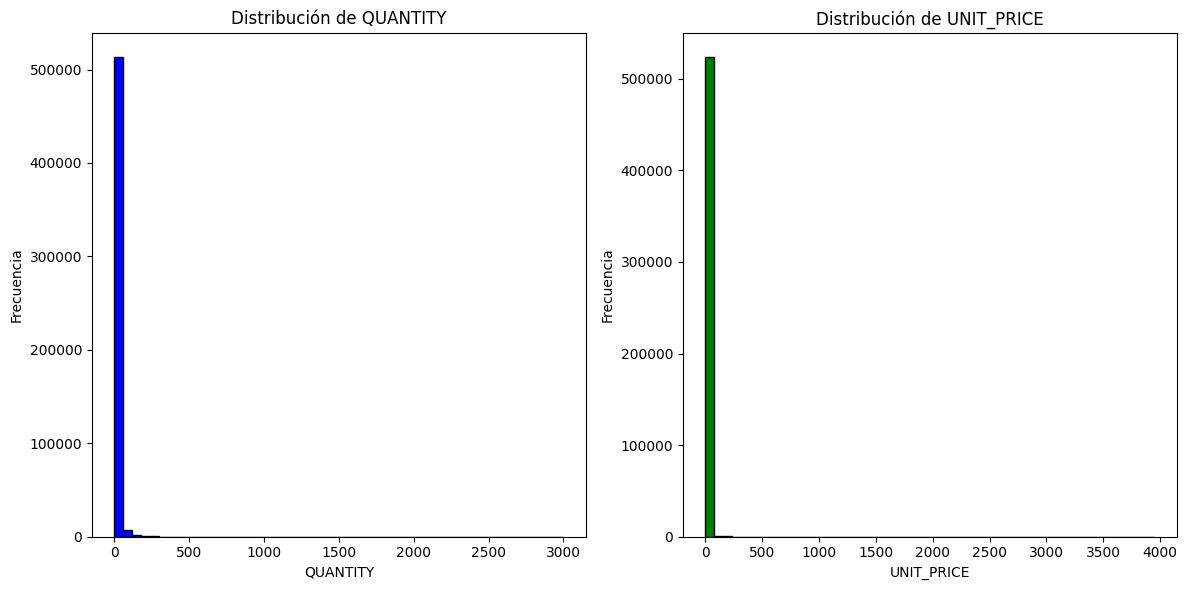

In [356]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Comprobamos nuevamente con histogramas la ausencia de valores negativos. 

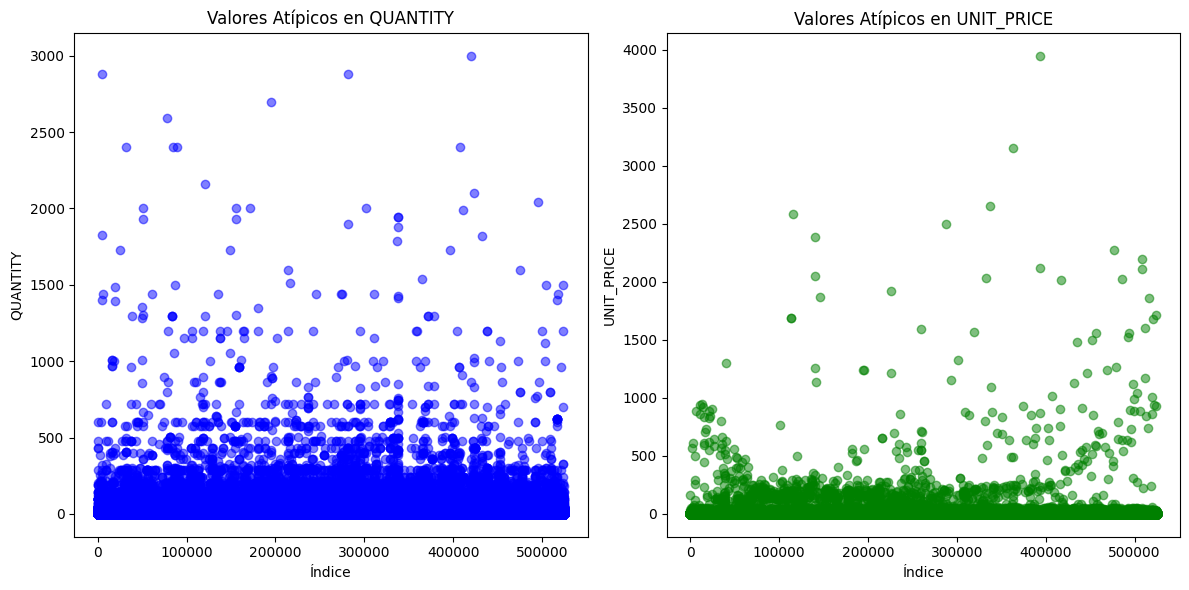

In [357]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

Con la ayuda de un diagrama de dispersión corroboramos que ya no existen valores atípicos. 

## Segmentacion por grupos.
---
Creamos nuevas columnas 'DAY', 'MONTH' y 'YEAR' para ser más especificos en las fechas. Adicionalmente, agregamos la columna 'TOTAL_REVENUE' para generar el total de las ganancias obtenidas por las compras.  

In [358]:
df['TOTAL_REVENUE'] = df['QUANTITY'] * df['UNIT_PRICE']

df['MONTH'] = df['INVOICE_DATE'].dt.month
df['YEAR'] = df['INVOICE_DATE'].dt.year
df['DAY'] = df['INVOICE_DATE'].dt.day_of_week

df.sample(10)

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
243377     558696      20727              LUNCH BAG  BLACK SKULL.        10   
194969     553907      23118         PARISIENNE JEWELLERY DRAWER          2   
345816     567530      22539               MINI JIGSAW DOLLY GIRL        24   
130687     547662      21774      DECORATIVE CATS BATHROOM BOTTLE         2   
129954     547568      22949                36 DOILIES DOLLY GIRL        12   
139485     548504      22501           PICNIC BASKET WICKER LARGE         2   
50816      540646      22739    RIBBON REEL CHRISTMAS SOCK BAUBLE         1   
165734     551007      20975  12 PENCILS SMALL TUBE RED RETROSPOT         2   
280296     561795      21094        SET/6 RED SPOTTY PAPER PLATES        12   
257061     559801      22501           PICNIC BASKET WICKER LARGE         2   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  \
243377 2020-07-01 12:09:00        1.65      16746.0  United Kingdom   
194969 2020-05-19 18:21:00        7.50      14551.0  United Kingdom   
345816 2020-09-21 09:33:00        0.42      12390.0         Belgium   
130687 2020-03-24 13:12:00        1.25      14085.0  United Kingdom   
129954 2020-03-24 09:50:00        1.45      13341.0  United Kingdom   
139485 2020-03-31 14:33:00       20.79          0.0  United Kingdom   
50816  2020-01-10 14:32:00        3.36          0.0  United Kingdom   
165734 2020-04-26 09:49:00        1.25          0.0  United Kingdom   
280296 2020-07-29 13:28:00        0.85      12716.0          France   
257061 2020-07-12 13:46:00       20.79          0.0  United Kingdom   

        TOTAL_REVENUE  MONTH  YEAR  DAY  
243377          16.50      7  2020    2  
194969          15.00      5  2020    1  
345816          10.08      9  2020    0  
130687           2.50      3  2020    1  
129954          17.40      3  2020    1  
139485          41.58      3  2020    1  
50816            3.36      1  2020    4  
165734           2.50      4  2020    6  
280296          10.20      7  2020    2  
257061          41.58      7  2020    6

# Métricas


##  Frequency. 
---

Esta métrica se puede construir contando el número de compras que un cliente ha hecho, puede ser por compra, o por producto, depende del enfoque que uno le 
quiera dar

---
<-TODO->Agregar la columna frequency para el clusterizado


In [359]:
top_10_products = df.groupby('DESCRIPTION')['QUANTITY'].sum().sort_values(ascending=False).head(10)
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='QUANTITY',barmode='group',title='Top 10 articulos mas vendidos',template='simple_white')
fig_coun.show()

Por medio de métodos de filtración y agrupación pudimos obtener el top 10 de los artículos más vendidos.

In [360]:
#Cambio de tipo de datos 
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('int')
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('str')

In [361]:
top_10_products = df.groupby(['CUSTOMER_ID'])['INVOICE_NO'].count().sort_values(ascending=False).head(10)
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='INVOICE_NO',barmode='group',title='Top 10 clientes', template= 'simple_white')
fig_coun.update_layout(xaxis_title='Fecha')
fig_coun.show()

Por medio de métodos de filtración y agrupación pudimos obtener el top 10 de los clientes con mayor fidelidad. 

### Frecuencia por orden de compra


In [362]:
df_freq=df[df['CUSTOMER_ID']!='0']

In [363]:
df_freq.sort_values('INVOICE_NO')

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0          536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365      71053                  WHITE METAL LANTERN         6   
2          536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...        ...                                  ...       ...   
535127     581587      22555            PLASTERS IN TIN STRONGMAN        12   
535126     581587      22556       PLASTERS IN TIN CIRCUS PARADE         12   
535138     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
535131     581587      22730           ALARM CLOCK BAKELIKE IVORY         4   
535139     581587      22138        BAKING SET 9 PIECE RETROSPOT          3   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  \
0      2019-12-01 08:26:00        2.55       17850  United Kingdom   
1      2019-12-01 08:26:00        3.39       17850  United Kingdom   
2      2019-12-01 08:26:00        2.75       17850  United Kingdom   
3      2019-12-01 08:26:00        3.39       17850  United Kingdom   
4      2019-12-01 08:26:00        3.39       17850  United Kingdom   
...                    ...         ...         ...             ...   
535127 2020-12-09 12:50:00        1.65       12680          France   
535126 2020-12-09 12:50:00        1.65       12680          France   
535138 2020-12-09 12:50:00        4.15       12680          France   
535131 2020-12-09 12:50:00        3.75       12680          France   
535139 2020-12-09 12:50:00        4.95       12680          France   

        TOTAL_REVENUE  MONTH  YEAR  DAY  
0               15.30     12  2019    6  
1               20.34     12  2019    6  
2               22.00     12  2019    6  
3               20.34     12  2019    6  
4               20.34     12  2019    6  
...               ...    ...   ...  ...  
535127          19.80     12  2020    2  
535126          19.80     12  2020    2  
535138          16.60     12  2020    2  
535131          15.00     12  2020    2  
535139          14.85     12  2020    2  

[392681 rows x 12 columns]

In [364]:
df_frequency=df_freq.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_NO'].count()
fig = px.histogram(df_frequency, x="INVOICE_NO",template='simple_white', title='Distribución de facturas por cliente')
fig.show()

Distribución de facturas por clientes que tienen asignado un número ID.

In [365]:
df_frequency = df_frequency.rename(columns={'INVOICE_NO': 'FREQUENCY'})

In [366]:
df=df.merge(df_frequency,on='CUSTOMER_ID')


##  Monetary. 
---
Esta métrica es la más sencilla, representa simplemente el monto en dinero invertido por el cliente comprando un producto.

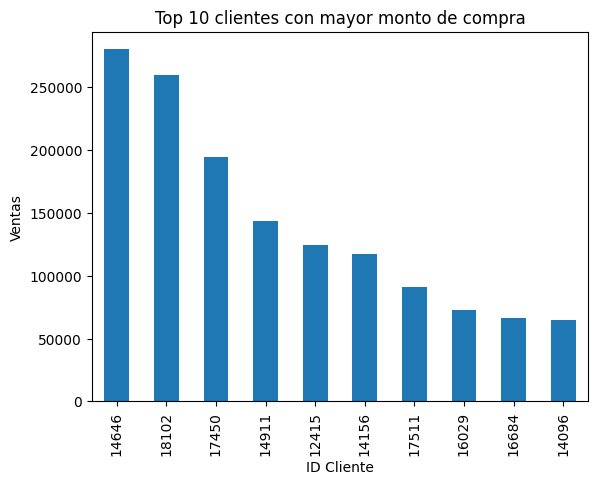

In [367]:
#CLIENTES QUE MAYOR GANANCIA DEJAN
top_10_products = df.groupby('CUSTOMER_ID')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor monto de compra",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

In [368]:
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 clientes con mayor monto de compra',template='simple_white')
fig_coun.show()

### Histograma de ganancias

In [369]:
df_mon=df[df['CUSTOMER_ID']!='0']

In [370]:
df_monetary=df_mon.groupby(['CUSTOMER_ID'],as_index=False)['TOTAL_REVENUE'].sum()
fig = px.histogram(df_monetary, x="TOTAL_REVENUE",template='simple_white')
fig.show()

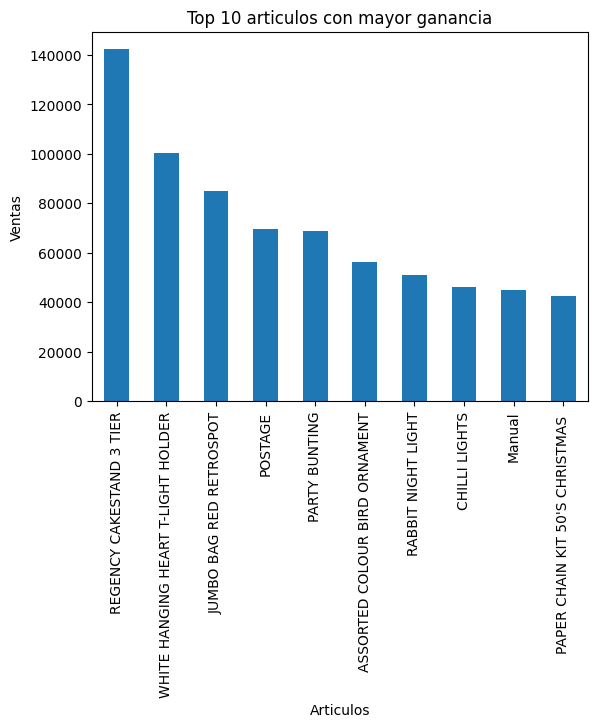

In [371]:
#ARTICULOS CON MAYOR GANANCIA
top_10_products = df.groupby('DESCRIPTION')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos con mayor ganancia",ylabel="Ventas",xlabel="Articulos")
plt.show()

In [372]:
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 articulos con mayor ganancia',template='simple_white')
fig_coun.show()

## Recency. 
---
Esta métrica se puede construir tomando como base el día actual y a este restar los días hasta la última fecha de compra del cliente, puede ser días, semanas, años, esto depende del tipo de industria y la frecuencia promedio de compra (las personas no compran un auto nuevo cada 2 semanas, o tal vez sí, pero no las conocemos). Así que puedes usar la última fecha de compra del conjunto de datos como parámetro para estimar la diferencia de días del resto de compras.

In [373]:
df_dates = df.sort_values('INVOICE_DATE')

df_dates.head()

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
0 2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30   
1 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2 2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
3 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
4 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   

   MONTH  YEAR  DAY  FREQUENCY  
0     12  2019    6        297  
1     12  2019    6        297  
2     12  2019    6        297  
3     12  2019    6        297  
4     12  2019    6        297

In [374]:
orders_per_month= df_dates.groupby('MONTH').agg({'CUSTOMER_ID':'nunique','TOTAL_REVENUE':'sum'})

orders_per_month['Orders_per_user'] = orders_per_month['TOTAL_REVENUE']/ orders_per_month['CUSTOMER_ID'] 
orders_per_month.sort_index(ascending=False,inplace=True)
print(orders_per_month.head(12))
print()
mean_orders= orders_per_month['Orders_per_user'].mean()
print('Promedio de compra por mes:',mean_orders)


       CUSTOMER_ID  TOTAL_REVENUE  Orders_per_user
MONTH                                             
12            1264     919143.570       727.170546
11            1664    1156205.610       694.835102
10            1364    1026312.330       752.428394
9             1266     950690.202       750.940128
8              935     644051.040       688.824642
7              948     598771.741       631.615761
6              991     660046.050       666.040414
5             1055     666116.400       631.389953
4              856     461834.931       539.526789
3              974     594081.760       609.940205
2              757     442882.000       585.048877
1              740     484378.310       654.565284

Promedio de compra por mes: 661.0271744875253


In [375]:
fig_coun=px.bar(orders_per_month,x=orders_per_month.index,y='TOTAL_REVENUE',barmode='group',title='Ganancias por mes',template='simple_white')
fig_coun.show()

In [376]:
fig = px.histogram(orders_per_month, x="Orders_per_user",template='simple_white')
fig.show()

### Dias sin comprar

In [377]:
df_recency=df.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_DATE'].max()
df_recency['RECENCY']=(datetime.now()-df_recency['INVOICE_DATE']).dt.days
df_recency

CUSTOMER_ID        INVOICE_DATE  RECENCY
0          12347 2020-12-07 15:52:00     1304
1          12348 2020-09-25 13:13:00     1377
2          12349 2020-11-21 09:51:00     1320
3          12350 2020-02-02 16:01:00     1613
4          12352 2020-11-03 14:37:00     1338
...          ...                 ...      ...
4331       18280 2020-03-07 09:52:00     1579
4332       18281 2020-06-12 10:53:00     1482
4333       18282 2020-12-02 11:43:00     1309
4334       18283 2020-12-06 12:02:00     1305
4335       18287 2020-10-28 09:29:00     1344

[4336 rows x 3 columns]

In [378]:
df=df.merge(df_recency,on='CUSTOMER_ID')

In [379]:
df.drop(['INVOICE_DATE_y'],axis=1,inplace=True)

In [380]:
df

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0          536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365      71053                  WHITE METAL LANTERN         6   
2          536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...        ...                                  ...       ...   
392676     581578      22993         SET OF 4 PANTRY JELLY MOULDS        12   
392677     581578      22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
392678     581578      22908        PACK OF 20 NAPKINS RED APPLES        12   
392679     581578      23215     JINGLE BELL HEART ANTIQUE SILVER        12   
392680     581578      22736          RIBBON REEL MAKING SNOWMEN         10   

            INVOICE_DATE_x  UNIT_PRICE CUSTOMER_ID          REGION  \
0      2019-12-01 08:26:00        2.55       17850  United Kingdom   
1      2019-12-01 08:26:00        3.39       17850  United Kingdom   
2      2019-12-01 08:26:00        2.75       17850  United Kingdom   
3      2019-12-01 08:26:00        3.39       17850  United Kingdom   
4      2019-12-01 08:26:00        3.39       17850  United Kingdom   
...                    ...         ...         ...             ...   
392676 2020-12-09 12:16:00        1.25       12713         Germany   
392677 2020-12-09 12:16:00        0.85       12713         Germany   
392678 2020-12-09 12:16:00        0.85       12713         Germany   
392679 2020-12-09 12:16:00        2.08       12713         Germany   
392680 2020-12-09 12:16:00        1.65       12713         Germany   

        TOTAL_REVENUE  MONTH  YEAR  DAY  FREQUENCY  RECENCY  
0               15.30     12  2019    6        297     1675  
1               20.34     12  2019    6        297     1675  
2               22.00     12  2019    6        297     1675  
3               20.34     12  2019    6        297     1675  
4               20.34     12  2019    6        297     1675  
...               ...    ...   ...  ...        ...      ...  
392676          15.00     12  2020    2         38     1302  
392677          10.20     12  2020    2         38     1302  
392678          10.20     12  2020    2         38     1302  
392679          24.96     12  2020    2         38     1302  
392680          16.50     12  2020    2         38     1302  

[392681 rows x 14 columns]

In [381]:
df_recency_merged=df[df['CUSTOMER_ID']!='0']

In [382]:
fig = px.histogram(df_recency_merged, x="RECENCY",template='simple_white')
fig.show()

## ¿Cúal es el país donde más se vende?

In [383]:
df_country=df.groupby(['REGION'],as_index=False)['TOTAL_REVENUE'].sum().sort_values(by='TOTAL_REVENUE',ascending=False)
top_10_country=df_country.head(10)
fig_coun=px.bar(top_10_country,x='REGION',y='TOTAL_REVENUE',barmode='group',title='Ventas por país',template='simple_white')
fig_coun.show()

In [384]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='world'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [385]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='europe'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [386]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='north america'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [387]:
fig = px.choropleth(
    top_10_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='europe'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

## Ventas en función del tiempo

## ¿En que mes se vende más?

In [388]:
df_dates=df.copy()
df_dates.set_index('INVOICE_DATE_x',inplace=True)
df_dates.sort_index(inplace=True)
df_dates.head(10)

INVOICE_NO STOCK_CODE  \
INVOICE_DATE_x                              
2019-12-01 08:26:00     536365     85123A   
2019-12-01 08:26:00     536365      71053   
2019-12-01 08:26:00     536365     84406B   
2019-12-01 08:26:00     536365     84029G   
2019-12-01 08:26:00     536365     84029E   
2019-12-01 08:26:00     536365      22752   
2019-12-01 08:26:00     536365      21730   
2019-12-01 08:28:00     536366      22633   
2019-12-01 08:28:00     536366      22632   
2019-12-01 08:34:00     536368      22912   

                                             DESCRIPTION  QUANTITY  \
INVOICE_DATE_x                                                       
2019-12-01 08:26:00   WHITE HANGING HEART T-LIGHT HOLDER         6   
2019-12-01 08:26:00                  WHITE METAL LANTERN         6   
2019-12-01 08:26:00       CREAM CUPID HEARTS COAT HANGER         8   
2019-12-01 08:26:00  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2019-12-01 08:26:00       RED WOOLLY HOTTIE WHITE HEART.         6   
2019-12-01 08:26:00         SET 7 BABUSHKA NESTING BOXES         2   
2019-12-01 08:26:00    GLASS STAR FROSTED T-LIGHT HOLDER         6   
2019-12-01 08:28:00               HAND WARMER UNION JACK         6   
2019-12-01 08:28:00            HAND WARMER RED POLKA DOT         6   
2019-12-01 08:34:00       YELLOW COAT RACK PARIS FASHION         3   

                     UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
INVOICE_DATE_x                                                               
2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        7.65       17850  United Kingdom          15.30   
2019-12-01 08:26:00        4.25       17850  United Kingdom          25.50   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:34:00        4.95       13047  United Kingdom          14.85   

                     MONTH  YEAR  DAY  FREQUENCY  RECENCY  
INVOICE_DATE_x                                             
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:28:00     12  2019    6        297     1675  
2019-12-01 08:28:00     12  2019    6        297     1675  
2019-12-01 08:34:00     12  2019    6        172     1333

In [389]:
df_series=df_dates['TOTAL_REVENUE']
df_series=df_series.resample('1M').sum()

In [390]:
fig = px.line(df_series, markers=True,title='Serie de ventas',template='simple_white')
fig.show()

## ¿En que mes se vende más cantidad de productos?

In [391]:
df_series_q=df_dates['QUANTITY']
df_series_q=df_series_q.resample('1M').sum()

In [392]:
fig_1 = px.line(df_series_q, markers=True,title='Serie de numero ventas',template='simple_white')
fig_1.show()


## Eliminación de outliers de las nuevas variables

<Axes: xlabel='FREQUENCY'>

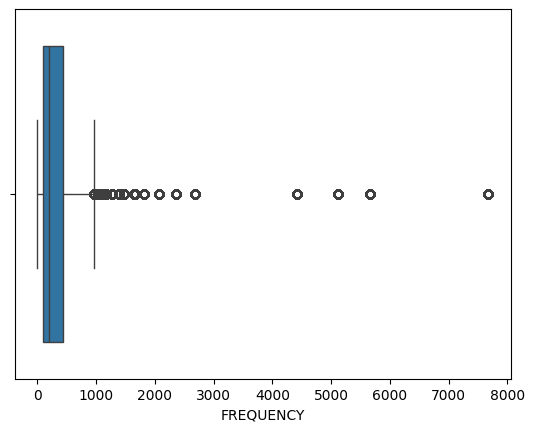

In [393]:
sns.boxplot(x=df['FREQUENCY'])

<Axes: xlabel='TOTAL_REVENUE'>

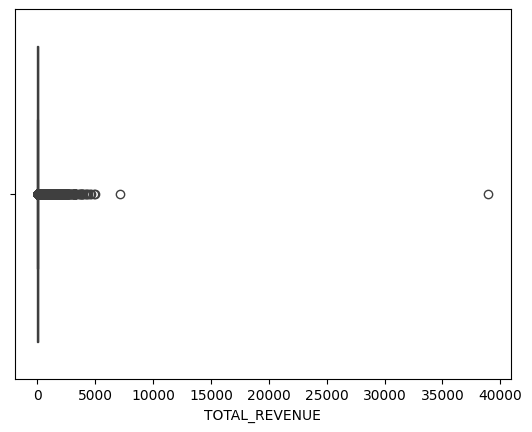

In [394]:
sns.boxplot(x=df['TOTAL_REVENUE'])

<Axes: xlabel='RECENCY'>

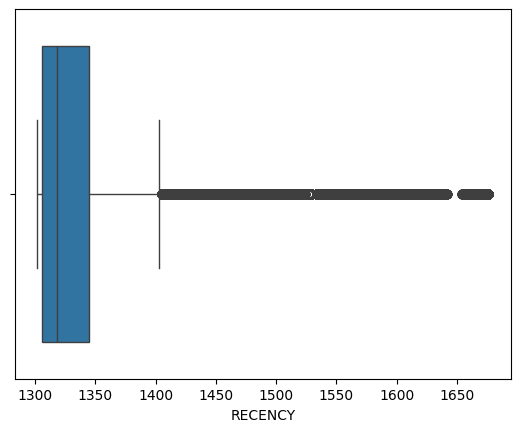

In [395]:
sns.boxplot(x=df['RECENCY'])

## Segmentacion por clusteres.
<-TODO-> Realizar los clusteres con 3 variables RFM 

In [396]:
data_positive_quantity = df.copy()

# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = data_positive_quantity.groupby('CUSTOMER_ID').agg(
    TOTAL_REVENUE=pd.NamedAgg(column='TOTAL_REVENUE', aggfunc='sum'),
    FREQUENCY=pd.NamedAgg(column='FREQUENCY', aggfunc='unique'),
    RECENCY=pd.NamedAgg(column='RECENCY', aggfunc='unique')).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_REVENUE FREQUENCY RECENCY
0       12347        4310.00     [182]  [1304]
1       12348        1797.24      [31]  [1377]
2       12349        1757.55      [73]  [1320]
3       12350         334.40      [17]  [1613]
4       12352        2506.04      [85]  [1338]


In [397]:
data_positive_quantity = df.copy()

# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = data_positive_quantity.groupby('CUSTOMER_ID').agg({'TOTAL_REVENUE':'sum',
                                                                   'FREQUENCY':'unique',
                                                                   'RECENCY':'unique'}).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_REVENUE FREQUENCY RECENCY
0       12347        4310.00     [182]  [1304]
1       12348        1797.24      [31]  [1377]
2       12349        1757.55      [73]  [1320]
3       12350         334.40      [17]  [1613]
4       12352        2506.04      [85]  [1338]


In [398]:
customer_data_copy=customer_data.copy()

In [399]:
customer_data_copy['FREQUENCY']=customer_data_copy['FREQUENCY'].astype('str')
customer_data_copy['RECENCY']=customer_data_copy['RECENCY'].astype('str')

In [400]:
customer_data_copy['FREQUENCY'] = customer_data_copy['FREQUENCY'].str.replace('[', '').str.replace(']', '')
customer_data_copy['RECENCY'] = customer_data_copy['RECENCY'].str.replace('[', '').str.replace(']', '')

In [401]:
customer_data_copy['FREQUENCY']=pd.to_numeric(customer_data_copy['FREQUENCY'])
customer_data_copy['RECENCY']=pd.to_numeric(customer_data_copy['RECENCY'])

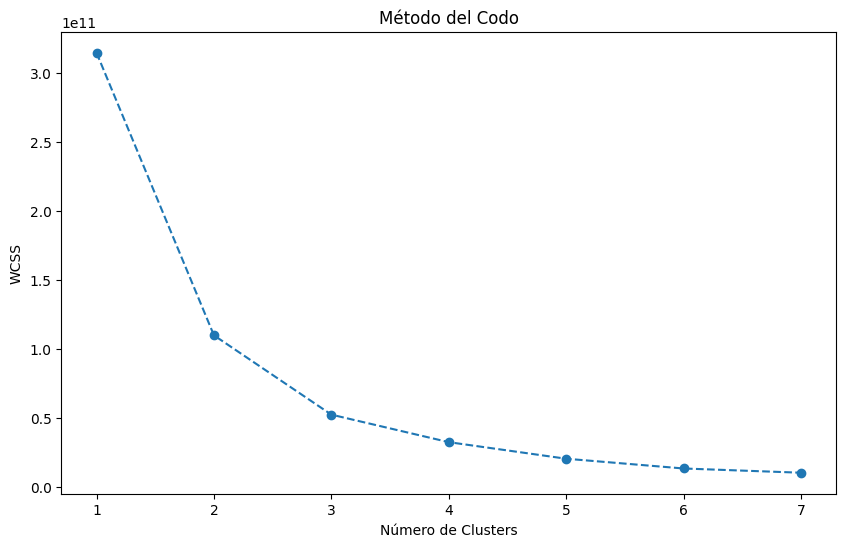

In [402]:
# Seleccionar las características para la segmentación
features = customer_data_copy[['TOTAL_REVENUE', 'FREQUENCY','RECENCY']]

## Estandarizar los datos
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)

# Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [403]:
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(customer_data_copy)
    print('Número de clústeres:', k) 
    print('Valor de la función objetivo', model.inertia_)

Número de clústeres: 1
Valor de la función objetivo 327599996604.6468
Número de clústeres: 2
Valor de la función objetivo 122621016503.71275
Número de clústeres: 3
Valor de la función objetivo 65485394005.4195
Número de clústeres: 4
Valor de la función objetivo 46252054505.45901
Número de clústeres: 5
Valor de la función objetivo 36236411179.09164
Número de clústeres: 6
Valor de la función objetivo 23595823803.021965
Número de clústeres: 7
Valor de la función objetivo 17177392450.35312


In [404]:
## Seleccionar las características para la segmentación
#features = df[['TOTAL_REVENUE', 'FREQUENCY','RECENCY']]
#
## Estandarizar los datos
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)
#
## Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
#wcss = []
#for i in range(1, 8):
#    kmeans = KMeans(n_clusters=i, random_state=42)
#    kmeans.fit(features_scaled)
#    wcss.append(kmeans.inertia_)
#
## Graficar el método del codo con el rango reducido
#plt.figure(figsize=(10, 6))
#plt.plot(range(1, 8), wcss, marker='o', linestyle='--')
#plt.title('Método del Codo')
#plt.xlabel('Número de Clusters')
#plt.ylabel('WCSS')
#plt.show()

In [405]:
# Aplicar K-means con 3 clusters a la muestra de datos
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
print(kmeans.inertia_)


20255151002.580788


In [406]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['TOTAL_REVENUE','FREQUENCY','RECENCY'])
for i in centroids.columns:
    centroids[i]=centroids[i].astype('int')

In [407]:
# Añade una columna con el número de clúster
customer_data_copy['label'] = kmeans.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid','3 centroid','4 centroid']
## Se necesitará reconfigurar el índice más tarde
data_all = pd.concat([customer_data_copy, centroids], ignore_index=True)

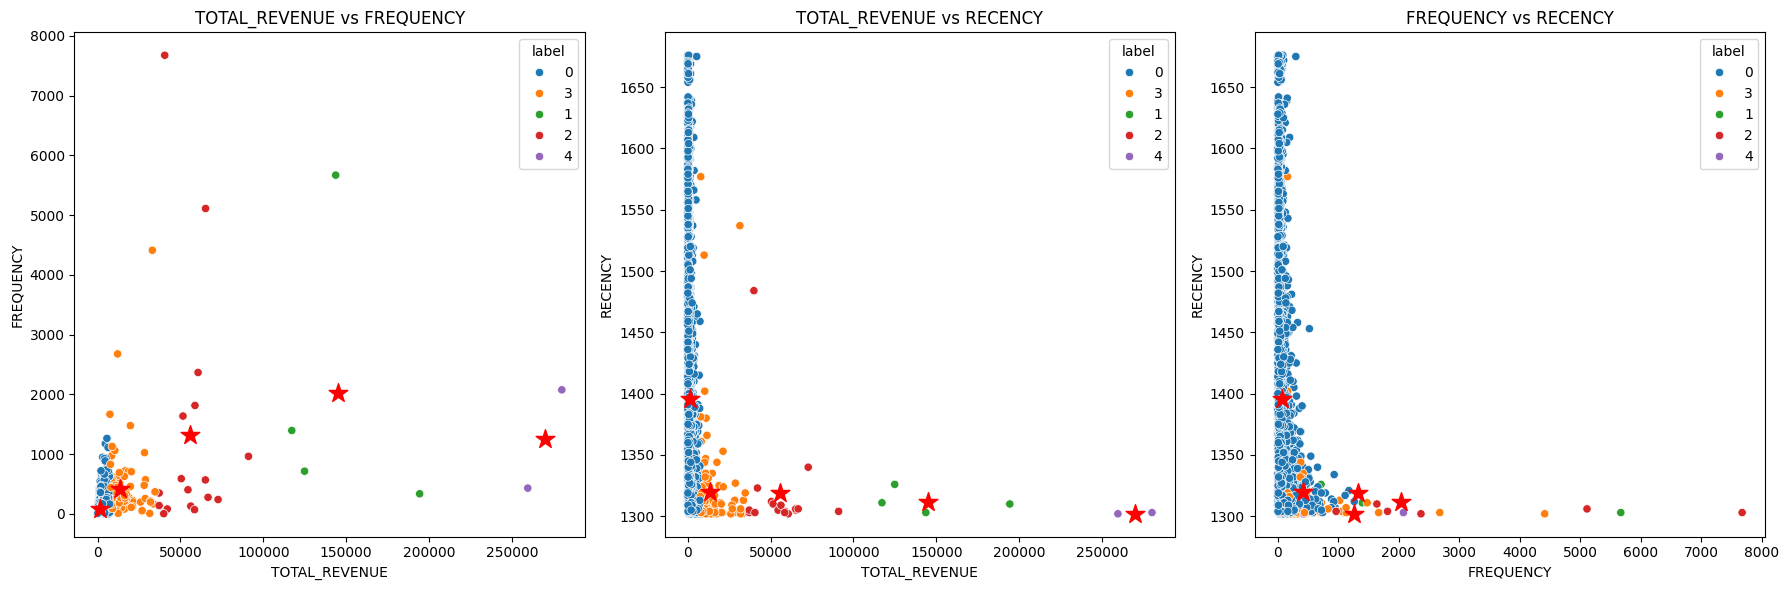

In [408]:
# Crear una figura con tres subtramas
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfica 1: TOTAL_REVENUE vs FREQUENCY
sns.scatterplot(x='TOTAL_REVENUE', y='FREQUENCY', hue='label', data=customer_data_copy, ax=axs[0])
axs[0].scatter(centroids['TOTAL_REVENUE'], centroids['FREQUENCY'], marker='*', s=200, c='red')
axs[0].set_title('TOTAL_REVENUE vs FREQUENCY')

# Gráfica 2: TOTAL_REVENUE vs RECENCY
sns.scatterplot(x='TOTAL_REVENUE', y='RECENCY', hue='label', data=customer_data_copy, ax=axs[1])
axs[1].scatter(centroids['TOTAL_REVENUE'], centroids['RECENCY'], marker='*', s=200, c='red')
axs[1].set_title('TOTAL_REVENUE vs RECENCY')

# Gráfica 3: FREQUENCY vs RECENCY
sns.scatterplot(x='FREQUENCY', y='RECENCY', hue='label', data=customer_data_copy, ax=axs[2])
axs[2].scatter(centroids['FREQUENCY'], centroids['RECENCY'], marker='*', s=200, c='red')
axs[2].set_title('FREQUENCY vs RECENCY')

# Mostrar la figura con las tres gráficas
plt.tight_layout()
plt.show()

In [410]:
centroids.head()

TOTAL_REVENUE  FREQUENCY  RECENCY       label
0           1157         73     1396  0 centroid
1         145056       2028     1312  1 centroid
2          55771       1318     1319  2 centroid
3          13714        412     1320  3 centroid
4         269931       1253     1302  4 centroid

# Reporte de resultados